In [1]:
import sys

# setting path
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
from JAL import train, make_QTables,make_Counts
from extended_pd import parallel_env

In [11]:
env = parallel_env()

# Values of gamma to test
gamma_values = [0.8, 0.9, 0.95]

# Lists to store results for each gamma
mean_rewards_list = []

In [14]:
trials = 1

tot_rew = []

for t in range(trials):

    tot_rew_per_episode = []

    for gamma in gamma_values:
        alfa = 0.01
        adecay = 0.0001
        env = parallel_env()
        observations, infos = env.reset()
        qtables = make_QTables(env, gamma)
        actionCounts,stateCounts= make_Counts(env)
        qtables,tot_rew_per_gamma = train(env, 40000, 0, 0.2, 0.000006, 100, qtables, stateCounts,actionCounts,gamma, alfa, adecay)
        tot_rew_per_episode.append(tot_rew_per_gamma)
        print(gamma)
    
    tot_rew.append(tot_rew_per_episode)

gamma done
gamma done
gamma done


In [15]:
print(tot_rew)

[[[0.01087035590463454, 0.016622815068413732, 0.009696431944335636, 0.009246358512733099, 0.01692602559949874, 0.016080623201385983, 0.0198627295045064, 0.005213226944993404, 0.01480381486770855, 0.014799788408280029, 0.010509040212651746, 0.010910975689944709, 0.01227274993050792, 0.013559148193590123, 0.014834664274533298, 0.0012571395104387045, 0.008543136284268931, 0.017998684914973712, 0.010578485798446108, 0.01267558577258316, 0.01065243079478996, 0.012577583039214349, 0.012915293498545375, 0.013700415048790202, 0.011340825170085505, 0.01029721773675951, 0.020310272222825613, 0.011391145316428234, 0.017514214334616893, 0.02021330067038664, 0.010903180937232047, 0.011745237691183094, 0.015062121945606667, 0.018586716625452224, 0.0162842069875118, 0.019799651844395447, 0.008373539196020817, 0.010906154485370955, 0.01590991979802873, 0.012681268372494543, 0.00741365422845867, 0.013906498281545368, 0.014821128003143799, 0.011700011918049903, 0.005589387778513917, 0.012997694056991643

In [16]:
my_array = np.array(tot_rew)

my_array.shape

(1, 3, 40000)

In [17]:
average_payoffs = np.mean(my_array, axis=0)

average_payoffs.shape

(3, 40000)

In [18]:
average_payoffs

array([[0.01087036, 0.01662282, 0.00969643, ..., 0.00333333, 0.00555556,
        0.00444444],
       [0.01553139, 0.02724365, 0.01764175, ..., 0.00777778, 0.00888889,
        0.00666667],
       [0.0387015 , 0.03300784, 0.04741853, ..., 0.00333333, 0.01111111,
        0.00555556]])

In [19]:
average_payoffs = np.transpose(average_payoffs)

average_payoffs.shape

(40000, 3)

In [20]:
average_payoffs

array([[0.01087036, 0.01553139, 0.0387015 ],
       [0.01662282, 0.02724365, 0.03300784],
       [0.00969643, 0.01764175, 0.04741853],
       ...,
       [0.00333333, 0.00777778, 0.00333333],
       [0.00555556, 0.00888889, 0.01111111],
       [0.00444444, 0.00666667, 0.00555556]])

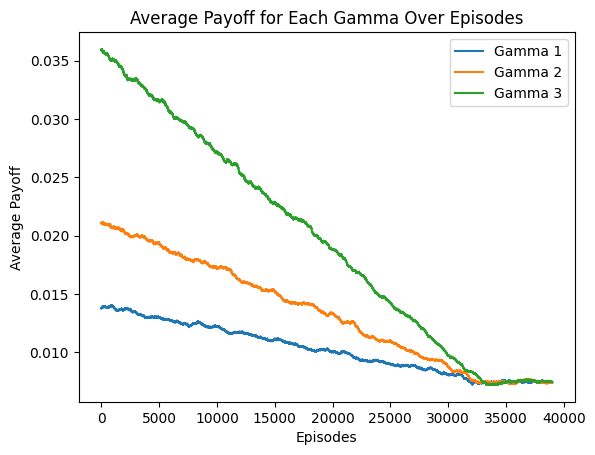

In [21]:
# Calculate the average payoff for each gamma
average_payoffs = np.mean(my_array, axis=0)

# Transpose the array for plotting
average_payoffs = np.transpose(average_payoffs)

# Set the window size for smoothing the plot
window_size = 1000

# Create a plot
fig, ax = plt.subplots()

# Plot each line for different gammas with smoothing
for i in range(average_payoffs.shape[1]):
    smoothed_values = np.convolve(average_payoffs[:, i], np.ones(window_size)/window_size, mode='valid')
    ax.plot(smoothed_values, label=f'Gamma {i+1}')

# Set labels and title
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Payoff')
ax.set_title('Average Payoff for Each Gamma Over Episodes')

# Add legend
ax.legend()

# Show the plot
plt.show()